======Data Headers Before Dropping Columns=======
   PassengerId  Survived  Pclass  \
0            1      Died       3   
1            2  Survived       1   
2            3  Survived       3   
3            4  Survived       1   
4            5      Died       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN      NaN  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN      NaN  
3      0            113803  53.1000  C123      NaN  
4    

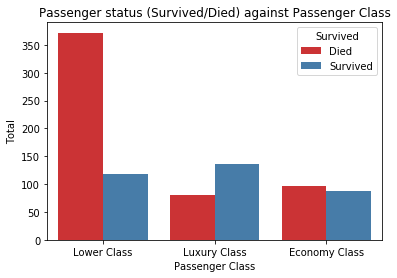

Visualization #2 : Survival Rate Based on Gender
Survived  Died  Survived
Sex                     
female      81       233
male       468       109


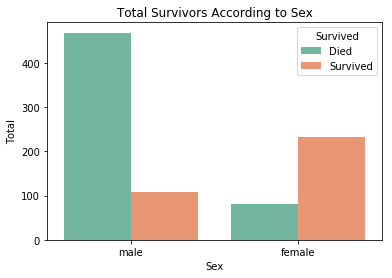

Visualization #3 : Survival Rate Based on Passenger Age Group


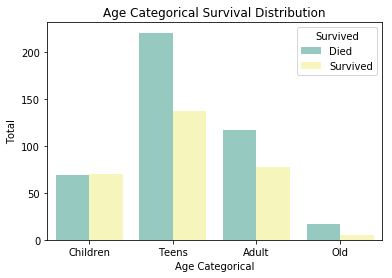

Visualization #4 : Survival Rate Based on Passenger Embarked Port
Survived     Died  Survived
Embarked                   
Cherbourg      75        93
Queenstown     47        30
Southampton   427       219


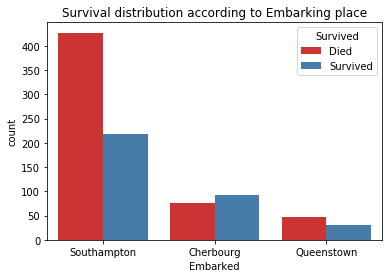

In [33]:
'''Python for Data Science - Perform Data Science on Titanic Dataset
a)Load the Titanic dataset into one of the data structures (NumPy or Pandas).
b)Display header rows and description of the loaded dataset.
c) Remove unnecessary features (E.g. drop unwanted columns) from the dataset.
d) Manipulate data by replacing empty column values with a default value.
e) Perform the following visualizations on the loaded dataset:
     i)   Passenger status (Survived/Died) against Passenger Class
     ii)  Survival rate of male vs female
     iii) No of passengers in each age group

'''

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

titanic_df = pd.read_csv('titanictrain.csv')

# Convert the survived column to strings for easier reading
titanic_df ['Survived'] = titanic_df ['Survived'].map({
    0: 'Died',
    1: 'Survived'
})


print("======Data Headers Before Dropping Columns=======")
print(titanic_df.head(5))

print("**** \n\nDATA TRANSFORMATION *****\n")

print("======Data Headers After Dropping Columns - First Way=======")
titanic_df.drop(['Parch','PassengerId','Name','Ticket'], axis=1, inplace=True)
print(titanic_df.head(5))
print("======Data Headers After Dropping Columns - Second Way =======")
titanic_df = titanic_df.drop(['SibSp','Fare'], axis=1)
print(titanic_df.head(5))
# Convert the Class column to strings for easier reading
titanic_df ['Pclass'] = titanic_df ['Pclass'].map({
    1: 'Luxury Class',
    2: 'Economy Class',
    3: 'Lower Class'
})

print("======Data Headers After Transforming Class Column =======")
print(titanic_df.head(5))

titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")
print("======Data Headers After Filling with default value for Embarked Column =======")
print(titanic_df.head(5))

# Convert the Embarked column to strings for easier reading
titanic_df ['Embarked'] = titanic_df ['Embarked'].map({
    'C':'Cherbourg',
    'Q':'Queenstown',
    'S':'Southampton'
})
print("======Data Headers After Transforming Embarked Column =======")
print(titanic_df.head(5))

print("\n\n\n**** DATA VISUALIZATIONS****\n\n")
print("Visualization #1 : Survival Rate Based on Passenger Sitting Class")
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1',data = titanic_df)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class',
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

print("Visualization #2 : Survival Rate Based on Gender")
print(pd.crosstab(titanic_df["Sex"],titanic_df.Survived))
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set2', data = titanic_df)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

print("Visualization #3 : Survival Rate Based on Passenger Age Group")
# We look at Age column and set Intevals on the ages and the map them to their categories 
#as (Children, Teen, Adult, Old)

interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
titanic_df['Age_cats'] = pd.cut(titanic_df.Age, interval, labels = categories)

ax = sns.countplot(x = 'Age_cats',  data = titanic_df, hue = 'Survived', palette = 'Set3')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")
plt.show()

print("Visualization #4 : Survival Rate Based on Passenger Embarked Port")
print(pd.crosstab(titanic_df['Embarked'], titanic_df.Survived))
ax = sns.countplot(x = 'Embarked', hue = 'Survived', palette = 'Set1', data = titanic_df)
ax.set(title = 'Survival distribution according to Embarking place')
plt.show()



In [55]:
'''Python for Data Science - Perform Data Science on Titanic Dataset
a)Load the Titanic dataset into one of the data structures (NumPy or Pandas).
*****DATA TRANSFORMATIONS***** 
b)Convert the survived column to strings for easier reading
# Convert the Class column to strings for easier reading
# Convert the Embarked column to strings for easier reading

c)Fill the empty coulmn of Embarked with 'S'
#Fill the empty coulmn of Cabin with 'XXX'

d) Drop the columns 'Parch','PassengerId','Name','Ticket','Embarked'
#Understand meaning of axis = 1 and inplace = True or False 

e)Display header rows and description of the loaded dataset.

'''

import numpy as np
import pandas as pd

# Doing a) 
titanic_df = pd.read_csv('titanictrain.csv')

#Doing c) line #8
titanic_df ['Survived'] = titanic_df ['Survived'].map({
    0: 'Died',
    1: 'Survived'
})

#Doing d) 
titanic_df.drop(['Parch','PassengerId','Name','Ticket'], axis = 1, inplace=True)
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S") #line #32
print(titanic_df.head(5))

   Survived  Pclass     Sex   Age  SibSp     Fare Cabin Embarked
0      Died       3    male  22.0      1   7.2500   NaN        S
1  Survived       1  female  38.0      1  71.2833   C85        C
2  Survived       3  female  26.0      0   7.9250   NaN        S
3  Survived       1  female  35.0      1  53.1000  C123        S
4      Died       3    male  35.0      0   8.0500   NaN        S


Visualization #1 : Survival Rate Based on Passenger Sitting Class


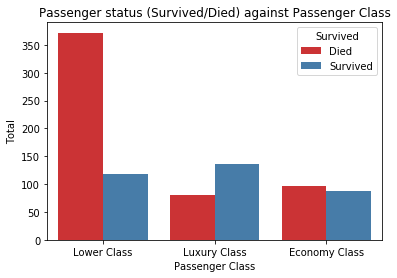

In [39]:
'''
f) Perform the following visualizations on the loaded dataset:
     i)   Passenger status (Survived/Died) against Passenger Class
     

     
#Understand the funda of 'Categorical Attribute' and plot based on it 
# Try this : 
Survival rate of male vs female
Survival Rate Based on Passenger Embarked Port

#Understand meaning of 'hue', 'palette' 
#Change value of 'set'and see


'''
import seaborn as sns
import matplotlib.pyplot as plt
print("Visualization #1 : Survival Rate Based on Passenger Sitting Class")
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1',data = titanic_df)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class',
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

Visualization #2 : Survival Rate Based on Gender
Survived  Died  Survived
Sex                     
female      81       233
male       468       109


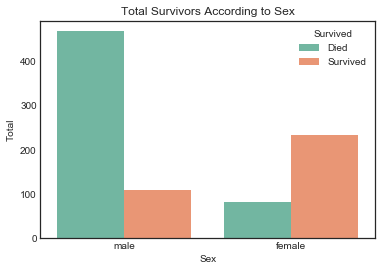

In [47]:
'''
f) Perform the following visualizations on the loaded dataset:
     ii)  Survival rate of male vs female

'''
print("Visualization #2 : Survival Rate Based on Gender")
print(pd.crosstab(titanic_df["Sex"],titanic_df.Survived))
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set2', data = titanic_df)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

Visualization #3 : Survival Rate Based on Passenger Age Group


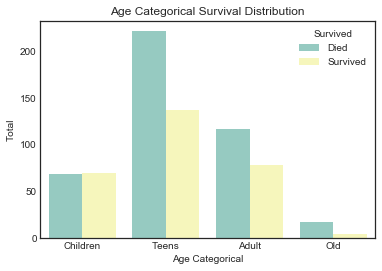

In [52]:
'''
f) Perform the following visualizations on the loaded dataset:
 iii) No of passengers in each age group
# We look at Age column and set Intevals on the ages and the map them to their categories 
#as (Children, Teen, Adult, Old)

#Understand why 5 values in 'interval' and 4 values in 'categories'

'''
print("Visualization #3 : Survival Rate Based on Passenger Age Group")


interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
titanic_df['Age_cats'] = pd.cut(titanic_df.Age, interval, labels = categories)

ax = sns.countplot(x = 'Age_cats',  data = titanic_df, hue = 'Survived', palette = 'Set3')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")
plt.show()

